In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed# libraries for data wrangling
import pandas as pd
import numpy as np
# libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
# reading longitudinal data
df_long = pd.read_csv('oasis_longitudinal.csv')

In [ ]:
# lets see first few entries of the dataset
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


**Data Cleaning**

In [ ]:
# lets see the summary stats of numerical columns
df_long.describe(include=[np.number])

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
# lets see the summary of categorical columns
df_long.describe(include=[np.object])

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


In [ ]:
# dropping irrelevant columns
df_long=df_long.drop(['Subject ID','MRI ID','Hand'],axis=1)

df_long.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
# checking missing values in each column
df_long.isna().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [ ]:
# Plotting distribution of SES
def univariate_mul(var):
    fig = plt.figure(figsize=(12,8))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(212)
    df_long[var].plot(kind='hist',ax=ax1, grid=True)
    ax1.set_title('Histogram of '+var, fontsize=14)

    ax2=sns.distplot(df_long[[var]],hist=False)
    ax2.set_title('Distribution of '+ var)
    plt.show()

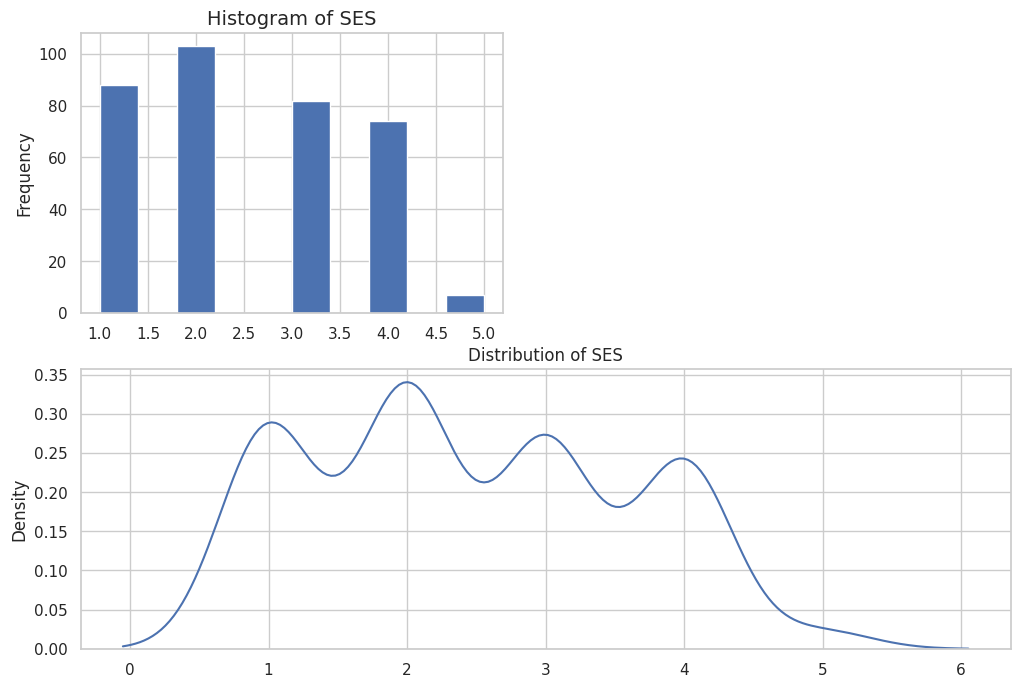

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [ ]:
# lets see the distribution of SES to decide which value we can impute in place of missing values.
univariate_mul('SES')
df_long['SES'].describe()

In [ ]:
# imputing missing value in SES with median
df_long['SES'].fillna((df_long['SES'].median()), inplace=True)

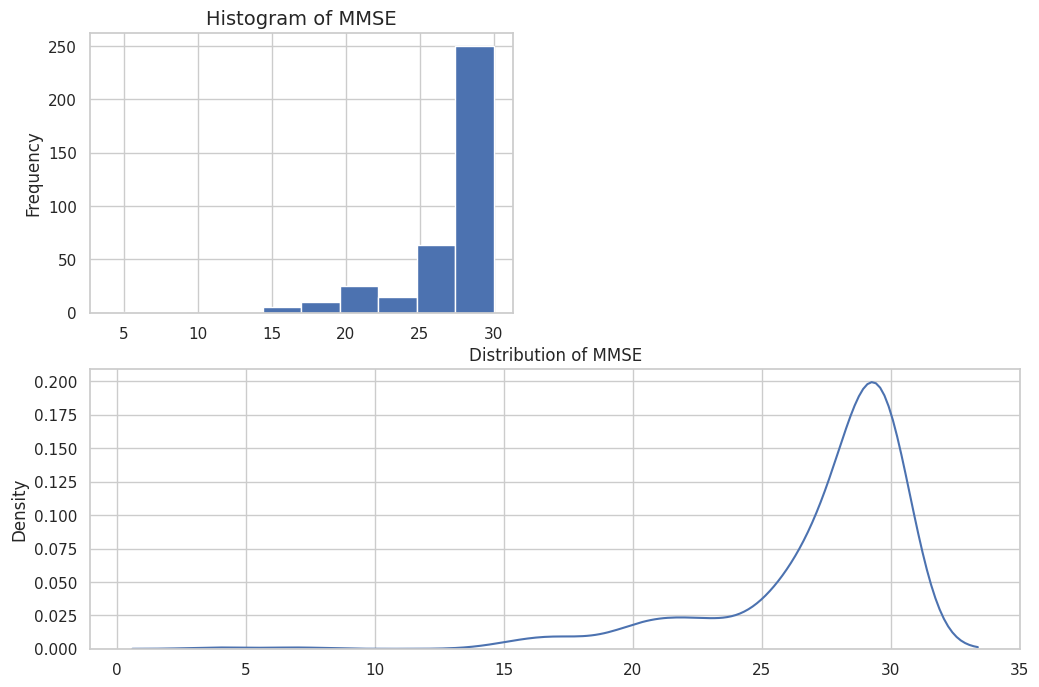

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [ ]:
univariate_mul('MMSE')
df_long['MMSE'].describe()

In [ ]:
# imputing MMSE with median values
df_long['MMSE'].fillna((df_long['MMSE'].median()), inplace=True)

In [ ]:
df_long.isna().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [ ]:
df_long

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
# saving the dataframe
df_long.to_csv('long.csv')

In [ ]:
# Defining function to create pie chart and bar plot as subplots
def plot_piechart(var):
  plt.figure(figsize=(10,6))
  plt.subplot(121)
  label_list = df_long[var].unique().tolist()
  colours=['#9BBFE0','#E8A09A','#FBE29F']
  df_long[var].value_counts().plot.pie(autopct = '%.2f%%',colors = colours,startangle = 0,labels=label_list)
  plt.title("Distribution of "+ var +"  variable")

  plt.subplot(122)
  ax = df_long[var].value_counts().plot(kind="barh",color = ['#9BBFE0'] )

  for i,j in enumerate(df_long[var].value_counts().values):
    ax.text(.7,i,j,fontsize=20)

  plt.title("Count of "+ var +" cases")
  plt.show()

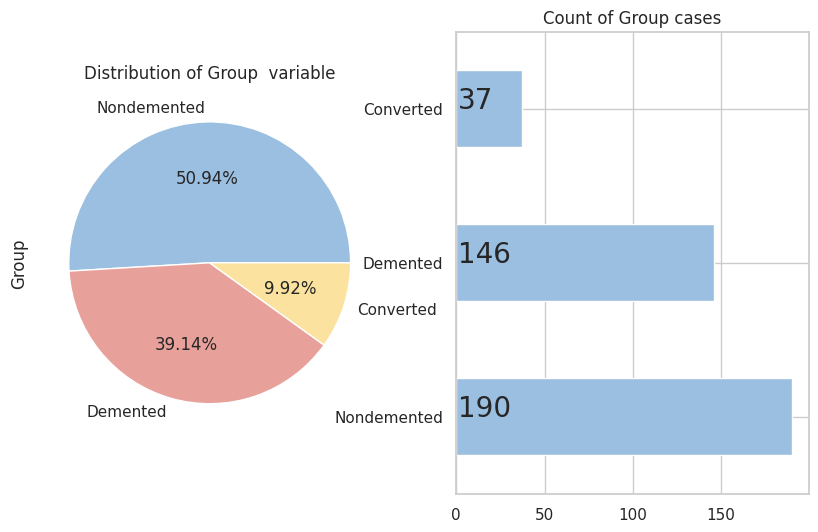

In [ ]:
plot_piechart('Group')

In [ ]:
df_long['CDR'].describe()

count    373.000000
mean       0.290885
std        0.374557
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        2.000000
Name: CDR, dtype: float64

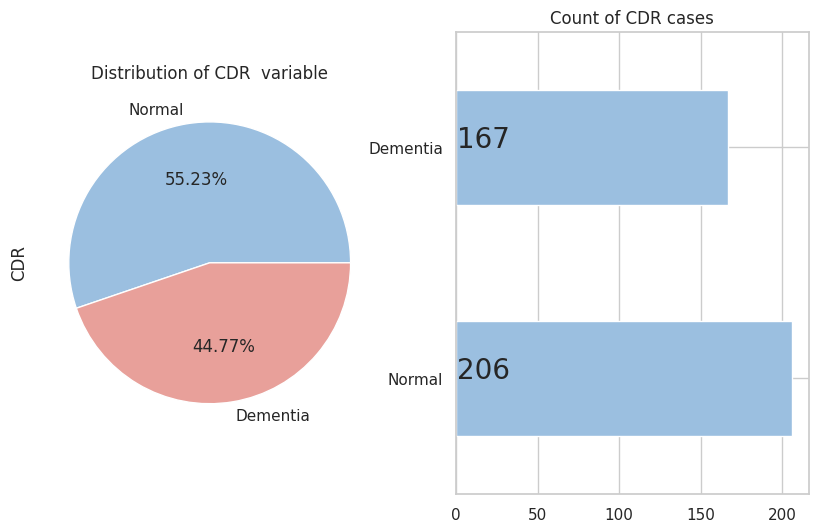

In [ ]:
# Plotting CDR with other variable
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(14,8))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)

    result = df_long.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())
         ).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Dementia status (Normal vs Dementia)')
    ax1.legend(loc="lower right")
    group_by_stat = df_long.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Cases')
    plt.show()



# Categorizing feature CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'

    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

df_long['CDR'] = df_long['CDR'].apply(lambda x: cat_CDR(x))

plot_piechart('CDR')

In [ ]:
df_long['MMSE'].describe()

count    373.000000
mean      27.351206
std        3.675329
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

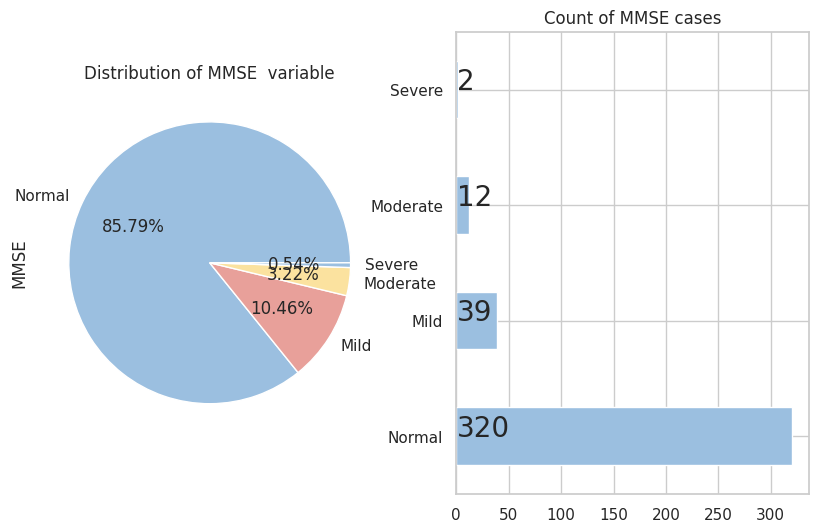

In [ ]:
# Categorizing feature MMSE
def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:                                        # As we have no cases of sever dementia CDR score=3
        return 'Mild'

df_long['MMSE'] = df_long['MMSE'].apply(lambda x: cat_MMSE(x))
plot_piechart('MMSE')

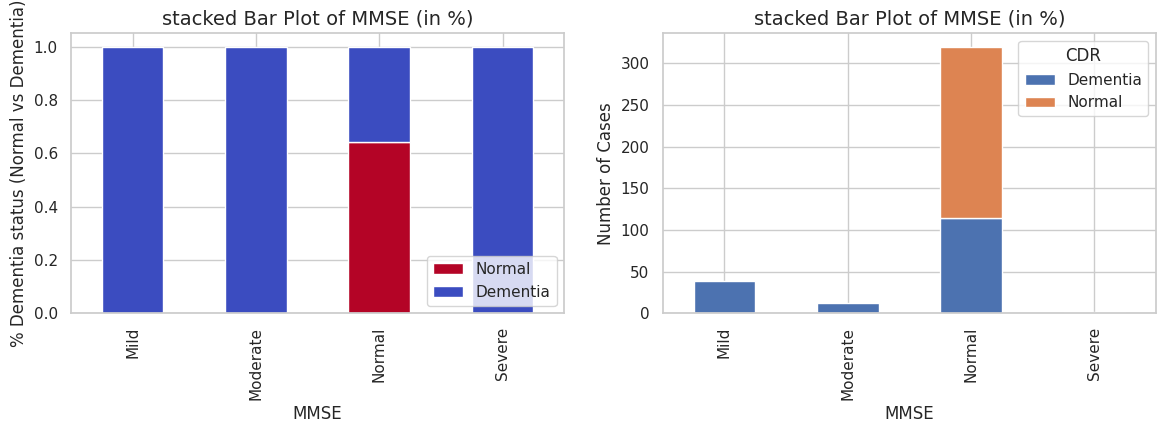

In [ ]:
univariate_percent_plot('MMSE')

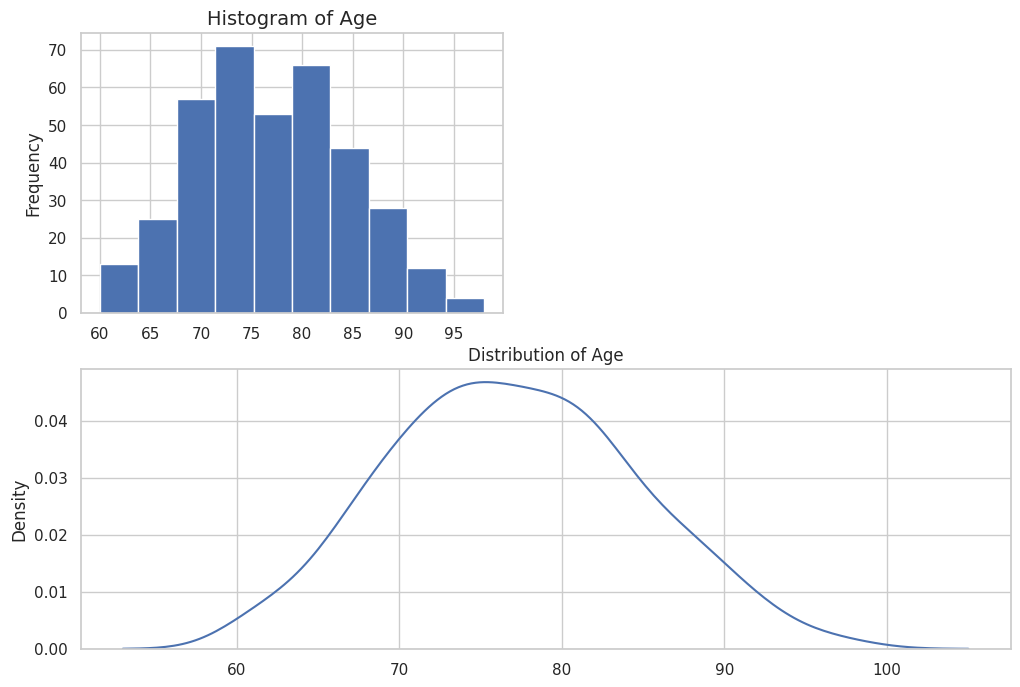

count    373.000000
mean      77.013405
std        7.640957
min       60.000000
25%       71.000000
50%       77.000000
75%       82.000000
max       98.000000
Name: Age, dtype: float64

In [ ]:
univariate_mul('Age')
df_long['Age'].describe()

In [ ]:
df_long['age_group'] = pd.cut(df_long['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
df_long['age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: age_group, dtype: int64

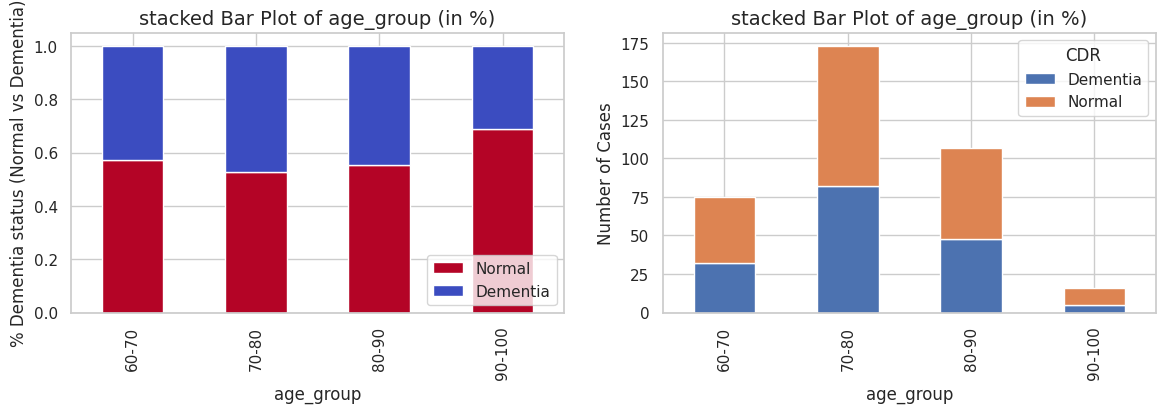

In [ ]:
# Now plotting age group to see dementia distribution
univariate_percent_plot('age_group')

**Bivarate Analysis**


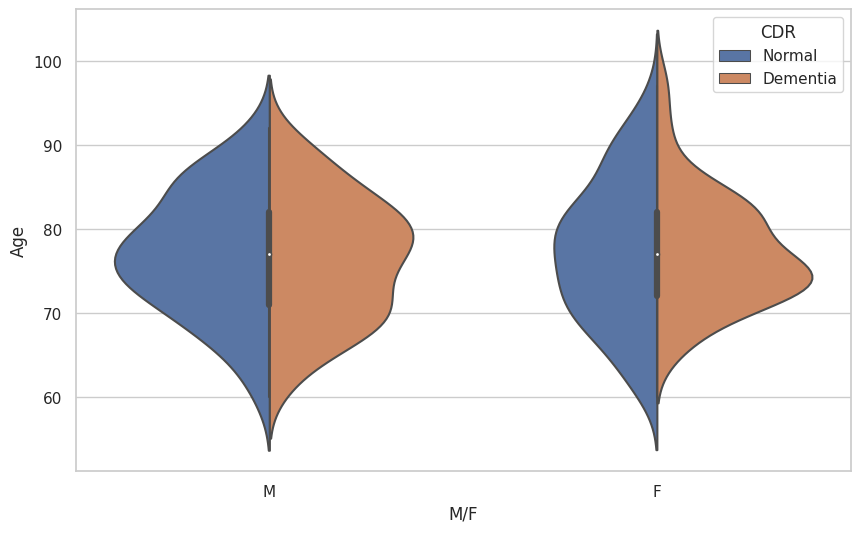

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR",split=True, data=df_long)
plt.show()

In [ ]:
df_long['eTIV'].describe()

count     373.000000
mean     1488.128686
std       176.139286
min      1106.000000
25%      1357.000000
50%      1470.000000
75%      1597.000000
max      2004.000000
Name: eTIV, dtype: float64

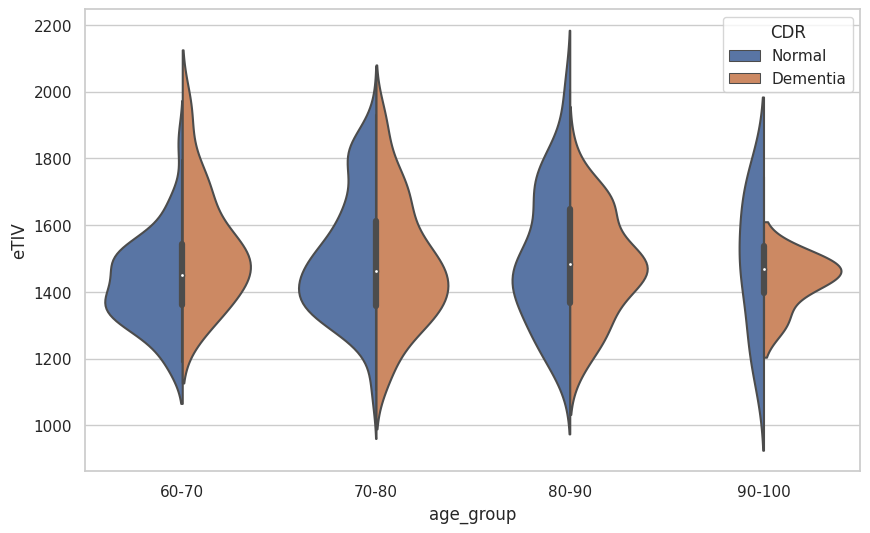

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="age_group", y="eTIV",hue="CDR",split=True, data=df_long)
plt.show()

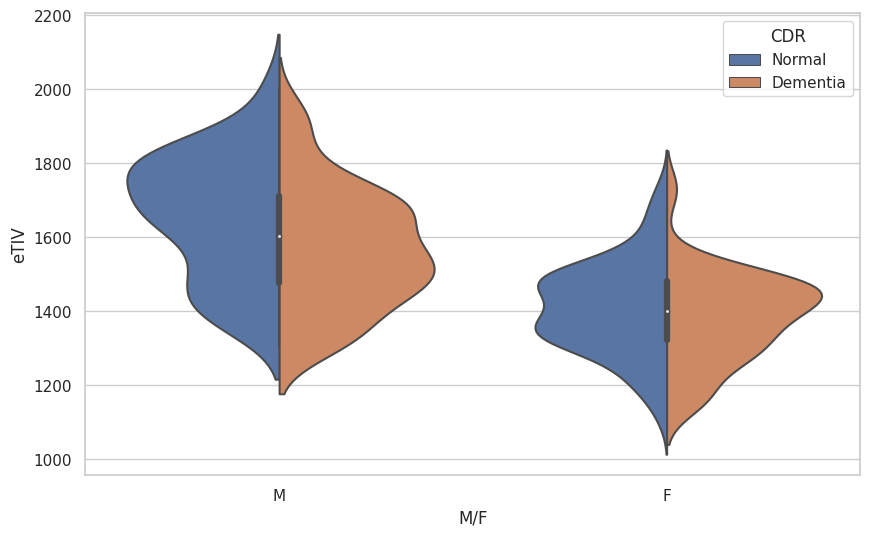

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="M/F", y="eTIV",hue="CDR",split=True, data=df_long)
plt.show()

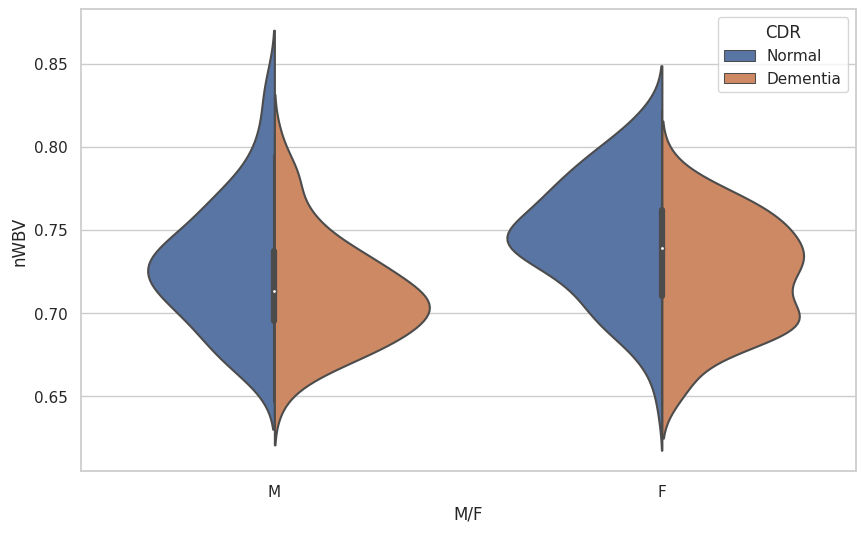

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="M/F", y="nWBV",hue="CDR",split=True, data=df_long)
plt.show()

In [ ]:
df_long['EDUC'].describe()

count    373.000000
mean      14.597855
std        2.876339
min        6.000000
25%       12.000000
50%       15.000000
75%       16.000000
max       23.000000
Name: EDUC, dtype: float64

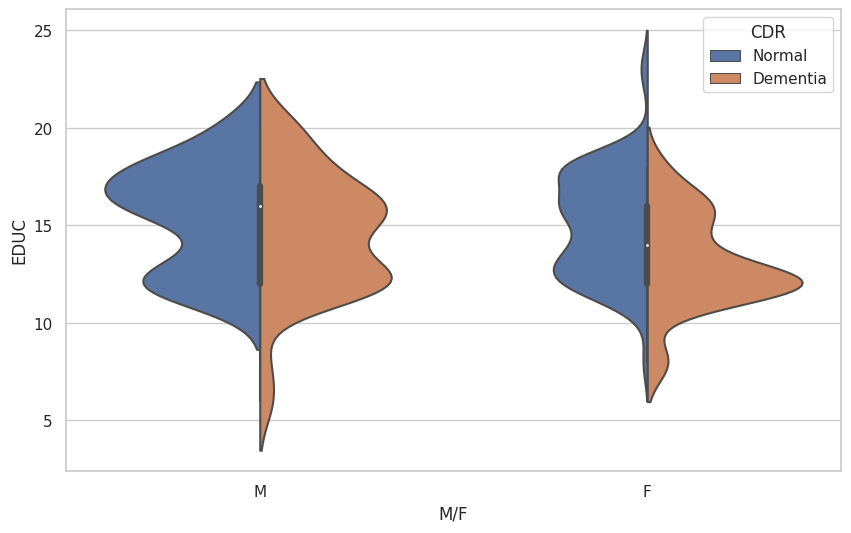

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR",split=True, data=df_long)
plt.show()

In [ ]:
df_long['SES'].describe()

count    373.000000
mean       2.436997
std        1.109307
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

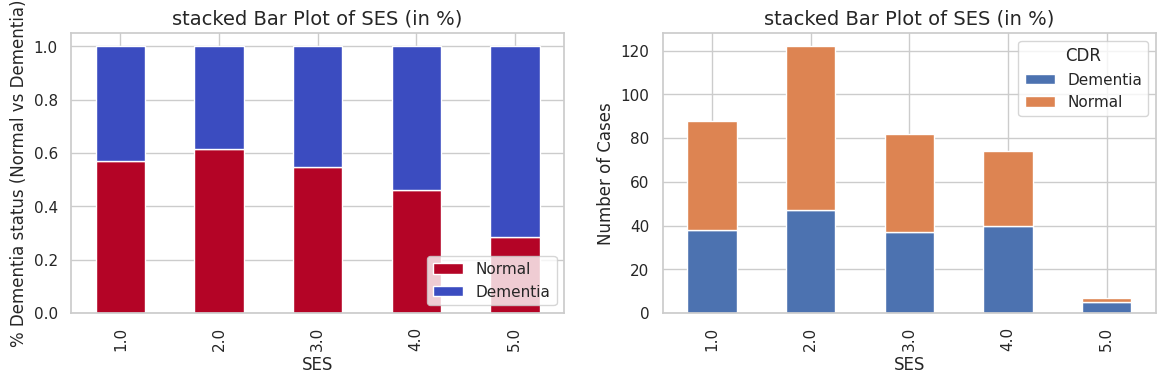

In [ ]:
# Now plotting socio economic status to see dementia distribution
univariate_percent_plot('SES')

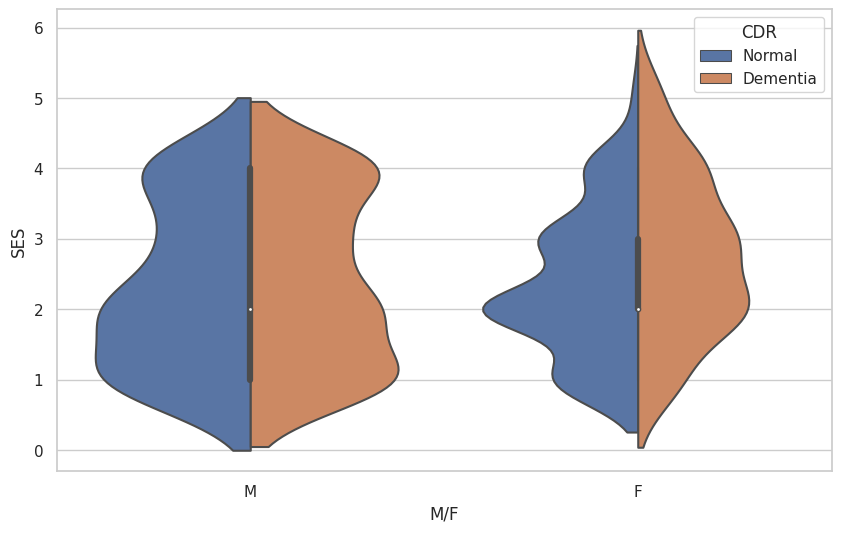

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR",split=True, data=df_long)
plt.show()

In [ ]:
df_long['ASF'].describe()

count    373.000000
mean       1.195461
std        0.138092
min        0.876000
25%        1.099000
50%        1.194000
75%        1.293000
max        1.587000
Name: ASF, dtype: float64

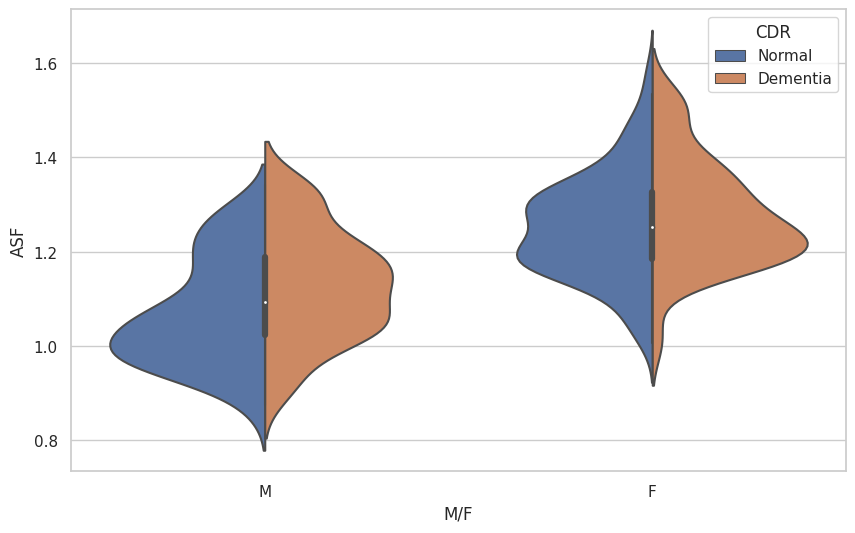

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="M/F", y="ASF",hue="CDR",split=True, data=df_long)
plt.show()

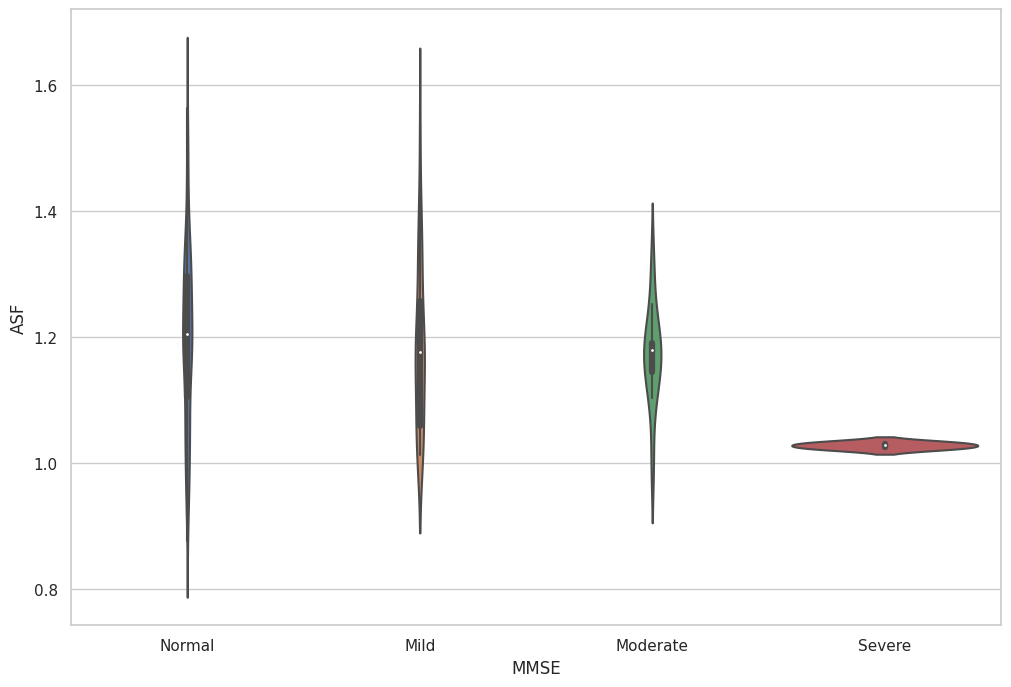

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="ASF",split=True, data=df_long)
plt.show()

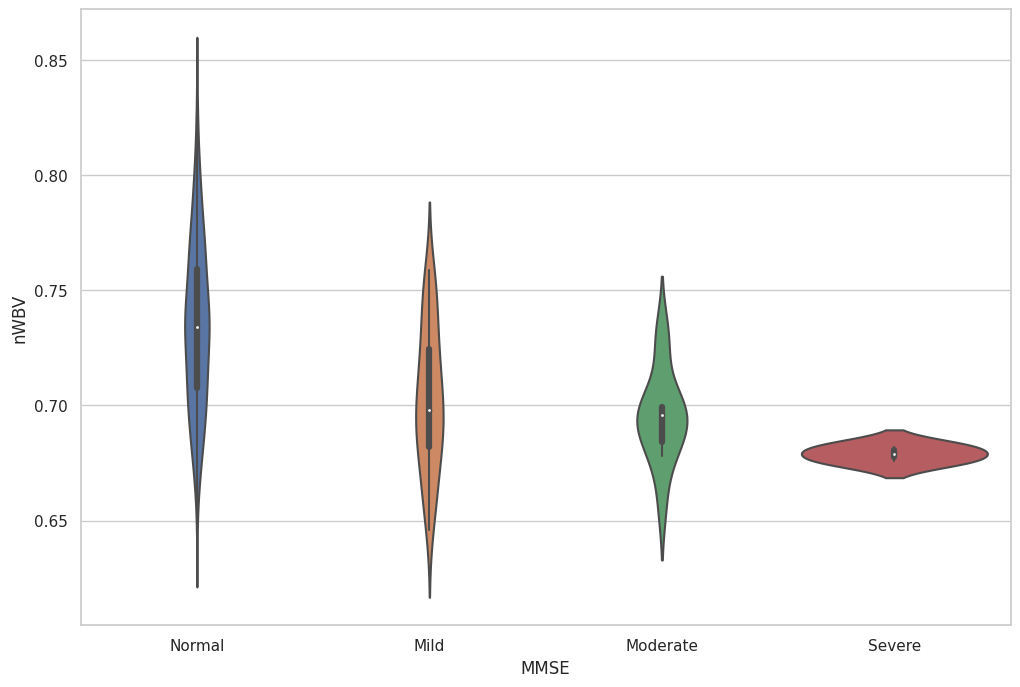

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="nWBV",split=True, data=df_long)
plt.show()

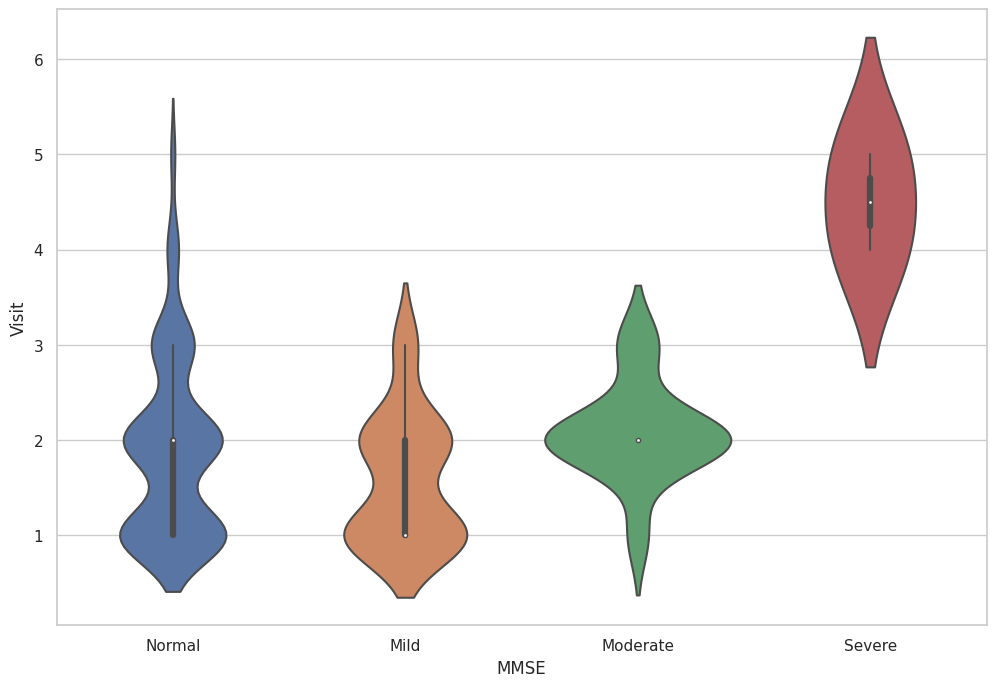

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="Visit",split=True, data=df_long)
plt.show()

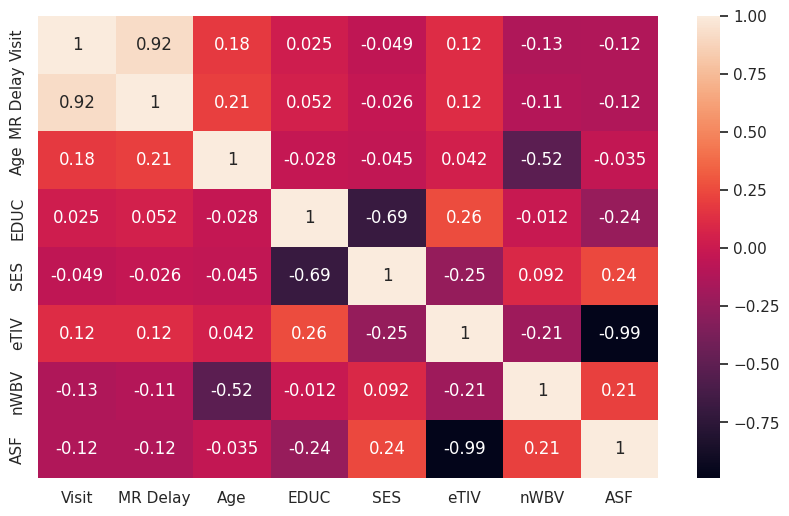

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_long.corr(), annot=True)
plt.show()